Fill in the missing code (#####) to use a NN to define a logistic regression. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import keras

Using TensorFlow backend.


In [2]:
num_features = 20
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=num_features, noise=0.1, random_state=1)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# reshape 1d arrays to 2d arrays
trainy = trainy.reshape(len(trainy), 1)
testy = testy.reshape(len(trainy), 1)

# create scaler
scaler = StandardScaler()
# fit scaler on training dataset
scaler.fit(trainy)
# transform training dataset
trainy = scaler.transform(trainy)
# transform test dataset
testy = scaler.transform(testy)

# fit scaler on training dataset
scaler.fit(trainX)
# transform training dataset
trainX = scaler.transform(trainX)
# transform test dataset
testX = scaler.transform(testX)

In [3]:
#Tranform the trainy and testy data into 1 and 0 labels
##### as many as needed
df = pd.DataFrame(trainy, columns=['y'])
df['lab']=np.where(df.y.shift(-1)>df.y,1,0) #like price prediction
trainy=df.lab.fillna(0).values
df = pd.DataFrame(testy, columns=['y'])
df['lab']=np.where(df.y.shift(-1)>df.y,1,0) #like price prediction
testy=df.lab.fillna(0).values

Train on 500 samples, validate on 500 samples
Epoch 1/100
500/500 [==============================] - 0s 384us/step - loss: 1.0238 - acc: 0.5160 - val_loss: 0.8153 - val_acc: 0.5940
Epoch 2/100
500/500 [==============================] - 0s 52us/step - loss: 0.7361 - acc: 0.6020 - val_loss: 0.6390 - val_acc: 0.7140
Epoch 3/100
500/500 [==============================] - 0s 106us/step - loss: 0.6128 - acc: 0.7340 - val_loss: 0.6147 - val_acc: 0.7500
Epoch 4/100
500/500 [==============================] - 0s 80us/step - loss: 0.5973 - acc: 0.7700 - val_loss: 0.6132 - val_acc: 0.7540
Epoch 5/100
500/500 [==============================] - 0s 82us/step - loss: 0.5976 - acc: 0.7600 - val_loss: 0.6149 - val_acc: 0.7480
Epoch 6/100
500/500 [==============================] - 0s 80us/step - loss: 0.5974 - acc: 0.7740 - val_loss: 0.6123 - val_acc: 0.7520
Epoch 7/100
500/500 [==============================] - 0s 64us/step - loss: 0.5973 - acc: 0.7620 - val_loss: 0.6112 - val_acc: 0.7500
Epoch 8/100
50

500/500 [==============================] - 0s 99us/step - loss: 0.5969 - acc: 0.7720 - val_loss: 0.6111 - val_acc: 0.7580
Epoch 62/100
500/500 [==============================] - 0s 82us/step - loss: 0.5977 - acc: 0.7680 - val_loss: 0.6124 - val_acc: 0.7480
Epoch 63/100
500/500 [==============================] - 0s 80us/step - loss: 0.5977 - acc: 0.7660 - val_loss: 0.6112 - val_acc: 0.7560
Epoch 64/100
500/500 [==============================] - 0s 78us/step - loss: 0.5973 - acc: 0.7760 - val_loss: 0.6127 - val_acc: 0.7540
Epoch 65/100
500/500 [==============================] - 0s 78us/step - loss: 0.5973 - acc: 0.7660 - val_loss: 0.6113 - val_acc: 0.7580
Epoch 66/100
500/500 [==============================] - 0s 80us/step - loss: 0.5968 - acc: 0.7620 - val_loss: 0.6104 - val_acc: 0.7520
Epoch 67/100
500/500 [==============================] - 0s 63us/step - loss: 0.5970 - acc: 0.7680 - val_loss: 0.6099 - val_acc: 0.7520
Epoch 68/100
500/500 [==============================] - 0s 69us/step

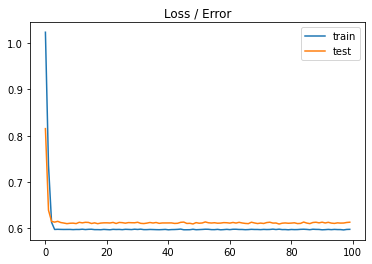

In [6]:
# logistic regression with scaled inputs outputs on the regression problem
# define model
model = Sequential()#####
model.add(Dense(1, activation='sigmoid',kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=0.0, l2=0.1),input_dim=20))#####
##### as many as needed
#compile the model
model.compile(optimizer=SGD(lr=0.01, momentum=0.9),loss='binary_crossentropy',metrics=['accuracy'])#####
history = model.fit(trainX, trainy, epochs=100,validation_data=(testX, testy))
# evaluate the model
train_e = model.evaluate(trainX, trainy, verbose=1)
test_e = model.evaluate(testX, testy, verbose=1)
print('Train loss: %.3f, Test loss: %.3f' % (train_e[0], test_e[0])) 
print('Train metric: %.3f, Test metric: %.3f' % (train_e[1], test_e[1])) 
#plot loss during training
plt.title('Loss / Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

For documentation see:
https://archive.ph/71Dvs 